In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
set_style("whitegrid")

In [2]:
# Select AAP data to do the time series prediction
data_aap = pd.read_csv("C:/Users/Ajay/Downloads/archive (12)/individual_stocks_5yr/individual_stocks_5yr/AAP_data.csv",
                        parse_dates=['date'])
data_aap.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,78.34,79.72,78.0100,78.90,1298137,AAP
1,2013-02-11,78.65,78.91,77.2300,78.39,758016,AAP
2,2013-02-12,78.39,78.63,77.5132,78.60,876859,AAP
3,2013-02-13,78.90,79.13,77.8500,78.97,1038574,AAP
4,2013-02-14,78.66,79.72,78.5850,78.84,1005376,AAP


In [3]:

# Get the number of rows and columns
rows, cols = data_aap.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 1259
Number of columns: 7


In [4]:

# Split the data into train and test data by index slicing
# The test data is the last 120 indices
data_aap_test = data_aap.iloc[-120:].copy()
data_aap_train = data_aap.drop(data_aap_test.index).copy()

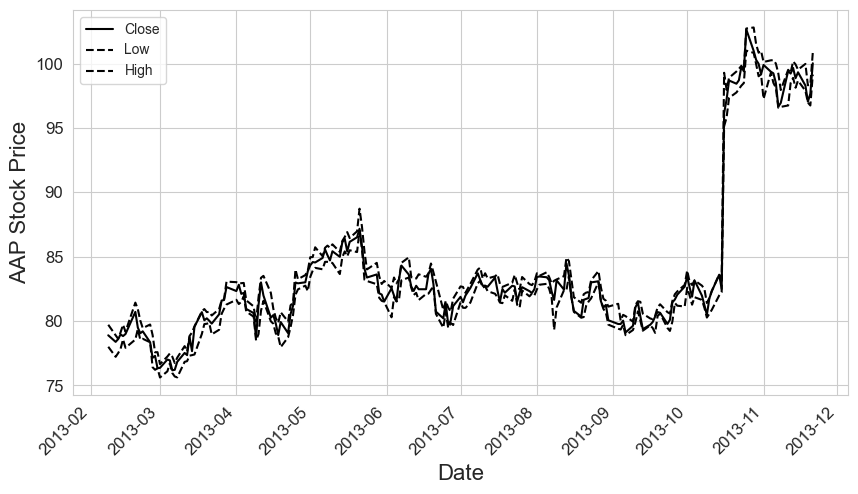

In [5]:
# Plot the first 200 observations of the training data to see the trend 

plt.figure(figsize=(10,5))

plt.plot(data_aap_train['date'].values[:200],
            data_aap_train['close'].values[:200],
            'k-', label='Close')
plt.plot(data_aap_train['date'].values[:200],
            data_aap_train['low'].values[:200],
            'k--', label='Low')
plt.plot(data_aap_train['date'].values[:200],
            data_aap_train['high'].values[:200],
            'k--', label='High')

plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

plt.xlabel("Date", fontsize=16)
plt.ylabel("AAP Stock Price", fontsize=16)

plt.legend()

plt.show()

In [6]:
# Use Linear Regression to fit the close value against the dates. 

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X = np.arange(1, len(data_aap_train) + 1).reshape(-1, 1)
y = data_aap_train.close

X_test = np.arange(1, len(data_aap_test) + 1).reshape(-1, 1)
y_test = data_aap_test.close

reg.fit(X, y)

LinearRegression()

In [7]:
reg.predict(X_test)

array([100.53178125, 100.59421832, 100.65665538, 100.71909245,
       100.78152952, 100.84396658, 100.90640365, 100.96884072,
       101.03127778, 101.09371485, 101.15615192, 101.21858899,
       101.28102605, 101.34346312, 101.40590019, 101.46833725,
       101.53077432, 101.59321139, 101.65564845, 101.71808552,
       101.78052259, 101.84295965, 101.90539672, 101.96783379,
       102.03027086, 102.09270792, 102.15514499, 102.21758206,
       102.28001912, 102.34245619, 102.40489326, 102.46733032,
       102.52976739, 102.59220446, 102.65464152, 102.71707859,
       102.77951566, 102.84195273, 102.90438979, 102.96682686,
       103.02926393, 103.09170099, 103.15413806, 103.21657513,
       103.27901219, 103.34144926, 103.40388633, 103.4663234 ,
       103.52876046, 103.59119753, 103.6536346 , 103.71607166,
       103.77850873, 103.8409458 , 103.90338286, 103.96581993,
       104.028257  , 104.09069406, 104.15313113, 104.2155682 ,
       104.27800527, 104.34044233, 104.4028794 , 104.46

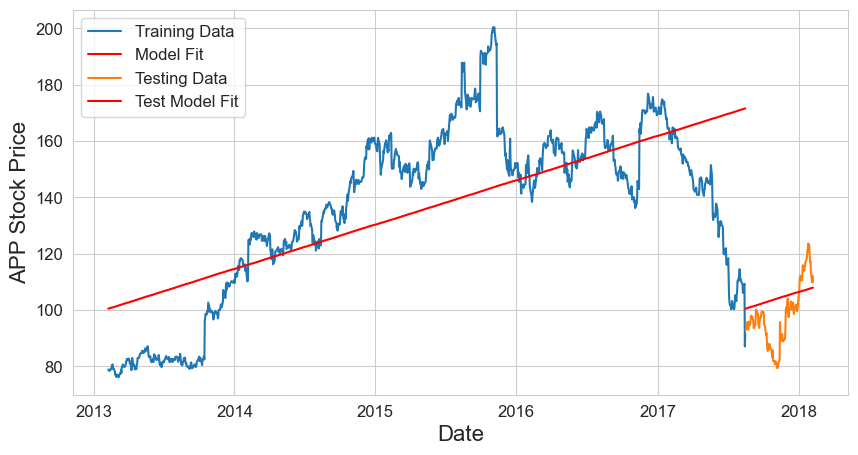

In [8]:
plt.figure(figsize=(10,5))

plt.plot(data_aap_train.date,
            data_aap_train.close,
            label="Training Data")

plt.plot(data_aap_train.date,
            reg.predict(X),
            "r",
            label="Model Fit")

plt.plot(data_aap_test.date,
            data_aap_test.close,
            label="Testing Data")

plt.plot(data_aap_test.date,
            reg.predict(X_test),
            "r",
            label="Test Model Fit")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.xlabel("Date", fontsize=16)
plt.ylabel("APP Stock Price", fontsize=16)

plt.show()

In [9]:
# MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(data_aap_train.close,
                      reg.predict(X))

508.59313012353005

In [10]:
beta_hat = (data_aap_train.close.values[-1] - data_aap_train.close.values[0])/len(data_aap_train)
sigma = np.sqrt(((data_aap_train.close.diff() - beta_hat)**2).sum()/len(data_aap_train))
drift_pred = data_aap_train.close.values[-1] + beta_hat*np.arange(1,len(data_aap_test) + 1)

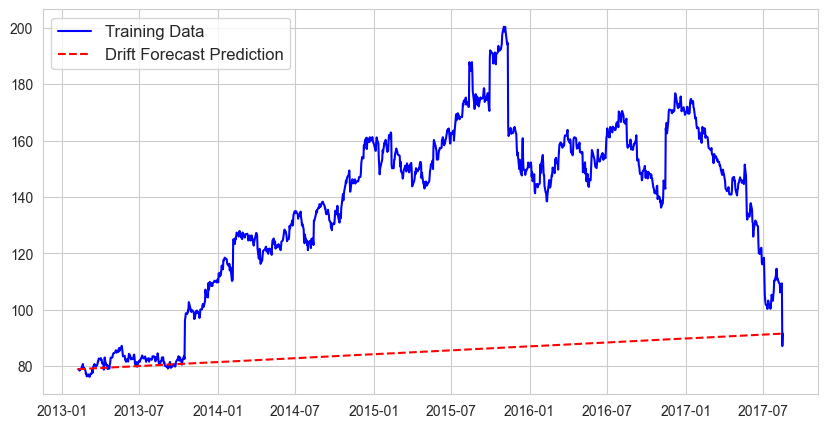

In [11]:
plt.figure(figsize=(10,5))

plt.plot(data_aap_train.date,
            data_aap_train.close,
            'b-',
            label="Training Data")

plt.plot(data_aap_train.date,
            data_aap_train.close.values[0] + beta_hat*data_aap_train.index,
            'r--',
            label="Drift Forecast Prediction")

plt.legend(fontsize=12, loc=2)

plt.show()

In [12]:
# MSE
from sklearn.metrics import mean_squared_error

mse_drift =mean_squared_error(data_aap_train.close,
                      data_aap_train.close.values[0] + beta_hat*data_aap_train.index)
print(f"Mean sq error using drift : {mse_drift}")

Mean sq error using drift : 3380.4758355827885


In [13]:
# Building the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=100, batch_size=10, validation_data=(X_test, y_test))

c:\Users\Ajay\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14249.3193 - val_loss: 7365.5083
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2973.2014 - val_loss: 7457.8218
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3004.5959 - val_loss: 7439.2646
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2927.5742 - val_loss: 7157.9307
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2963.6755 - val_loss: 7199.8169
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2910.6973 - val_loss: 7037.8438
Epoch 7/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2851.1030 - val_loss: 6932.8999
Epoch 8/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2827.4272 - val_loss: 6804.0601
Epoch 9/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2784.8184 - val_loss: 6795.2969
Epoch 10/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2815.9387 - val_loss: 6524.5469
Epoch 11/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2837.4

In [14]:
# Evaluate the model on the validation set
val_loss = model.evaluate(X_test, y_test)

# Make predictions on the validation set
predictions = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 321.8813  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


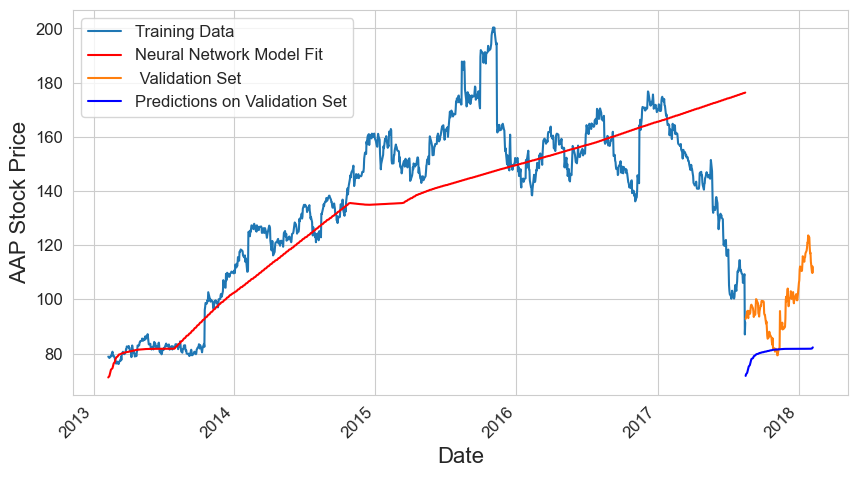

In [15]:
# Plot the training data, model fit, and predictions
plt.figure(figsize=(10, 5))
plt.plot(data_aap_train.date, data_aap_train.close, label="Training Data")
plt.plot(data_aap_train.date, model.predict(data_aap_train.index), "r", label="Neural Network Model Fit")
plt.plot(data_aap_test.date, data_aap_test.close, label=" Validation Set")
plt.plot(data_aap_test.date, predictions, "b", label="Predictions on Validation Set")
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.xlabel("Date", fontsize=16)
plt.ylabel("AAP Stock Price", fontsize=16)
plt.legend(fontsize=12)
plt.show()

In [16]:
print(f'Mean Squared Error on validation set: {val_loss}')
print("Predictions on validation set:")
print(predictions)

Mean Squared Error on validation set: 416.3374938964844
Predictions on validation set:
[[71.783325]
 [72.35617 ]
 [72.929016]
 [73.501854]
 [74.0747  ]
 [74.647545]
 [75.22038 ]
 [75.79323 ]
 [76.36608 ]
 [76.93892 ]
 [77.51176 ]
 [78.00579 ]
 [78.33921 ]
 [78.634766]
 [78.93032 ]
 [79.15066 ]
 [79.35102 ]
 [79.55138 ]
 [79.6788  ]
 [79.75745 ]
 [79.83609 ]
 [79.914734]
 [79.99314 ]
 [80.068474]
 [80.14697 ]
 [80.22548 ]
 [80.303986]
 [80.35803 ]
 [80.404495]
 [80.45096 ]
 [80.49742 ]
 [80.543884]
 [80.590355]
 [80.63681 ]
 [80.68329 ]
 [80.72975 ]
 [80.776215]
 [80.82268 ]
 [80.86914 ]
 [80.91562 ]
 [80.96207 ]
 [81.00853 ]
 [81.05501 ]
 [81.10147 ]
 [81.14794 ]
 [81.1944  ]
 [81.24086 ]
 [81.28732 ]
 [81.33379 ]
 [81.38026 ]
 [81.42238 ]
 [81.43887 ]
 [81.45538 ]
 [81.47188 ]
 [81.48837 ]
 [81.50487 ]
 [81.52138 ]
 [81.53789 ]
 [81.55437 ]
 [81.57088 ]
 [81.58739 ]
 [81.60388 ]
 [81.620384]
 [81.63689 ]
 [81.65338 ]
 [81.66989 ]
 [81.686386]
 [81.70244 ]
 [81.71849 ]
 [81.73453 ]
 [8